# Homework 2
## CS 5787 Deep Learning
## Spring 2023
#### Instructor: Prof. Alejandro (Alex) Jaimes
#### Discussion Section Leader: Jack Morris
#### TAs: Andrew Bennett, Yair Schiff
#### Graders: Eylul Ertay, Anastasiia Sorokina, Zhengchun Shang, Jamie Cao
#### Due: 3/3/23


## Problem 1 - Linear Algebra Review #1

$$
Let A = 
\left(\begin{array}{cc} 
1 & 2\\
5 & -2
\end{array}\right)
and B = 
\left(\begin{array}{ccc} 
1 & 0 & 0\\ 
2 & 0 & 2
\end{array}\right)
$$ 


#### Part 1 (3 points)
Compute $Trace(A)$:

<font color='blue'> 
Answer:
   
$$Trace(A) = 1 - 2 = -1 $$

#### Part 2 (4 points)
Compute $Trace(BB^T)$

<font color='blue'> 

Answer:
$$ Trace(BB^T) = 
Trace \left(
    \left(\begin{array}{ccc} 
        1 & 0 & 0\\ 
        2 & 0 & 2
    \end{array}\right) * 
    \left(\begin{array}{cc} 
        1 & 2\\ 
        0 & 0 \\
        0 & 2
    \end{array}\right)\right)
    = 
    Trace\left(\begin{array}{cc} 
        1 & 2 \\ 
        2 & 8
    \end{array}\right) = 1 + 8 = 9 $$

### Problem 2 - Linear Algebra Review #2 (4 points)

Let $A ∈ R^{n×n}$, $D ∈ R^{n×n}$, $b ∈ R^n$, and $x^T(A + D) = b^T$.

Use the matrix inverse to solve for $x$ and simplify. Assume that
$det(A + D) \neq 0$.


<font color='blue'> 

Answer:
  
$$x^T(A + D) = b^T$$

multiplying both sides by $(A + D)^{-1}$:
    
$$x^T = b^T(A + D)^{-1}$$ 
 
Taking the transpose of both sides and simplyifing down:

$$x = (b^T(A + D)^{-1})^T = ((A + D)^{-1})^Tb = ((A + D)^T)^{-1}b = (A^T + D^T)^{-1}b  $$ 
    
    
Note that this works only when $(A+D)$ is invertible, i.e. its determinant is not zero, as given in the problem.

### Problem 3 - Linear Algebra Review #3
Let matrix $A ∈ R^{n×n}$ and matrix $B ∈ R^{n×m}$, where $n \neq m$.

#### Part 1 (1 point)
If it is possible to compute the matrix product $AB$, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’

<font color='blue'> 

Answer: $$nxm$$


#### Part 2 (1 point)
If it is possible to compute the matrix product BA, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’


<font color='blue'> 

Answer: $$Not Possible$$

### Problem 4 - Regression
Tastes in music have gradually changed over the years. Based on this observation, our
goal is to predict the year of a song based on its timbre summary features. This dataset
is from the 2011 Million Song Challenge dataset: https://labrosa.ee.columbia.edu/millionsong/

To establish a baseline, we wish to build a linear model that predicts the year. Given an
input $x ∈ R^{90}$, we want to find parameters for a model $\hat y = round(f (x))$ that predicts the
year, where $\hat y ∈ Z$.

We are going to explore three shallow (linear) neural network models with different activation functions for this task.

To evaluate the model, you must round the output of your linear neural network. You then compute the mean squared error.

#### Part 1 - Load and Explore the Data (5 points)
Download the music year classification dataset music-dataset.txt at https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd. Each row is an instance. The first value
is the target to be predicted (a year), and the remaining 90 values in a row are all input
features. Split the dataset into train and test partitions by treating the first 463,714 examples as the train set and the remaining examples as the test set. The first 12 dimensions
are the average timbre and the remaining 78 are the timbre covariance in the song.

Write a function to load the dataset, e.g.,
trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias) where
trainYears has the years for the training data, trainFeat has the features, etc. addBias
appends a ‘1’ to your feature vectors. Each of the returned variables should be NumPy
arrays.

Write a function mse = musicMSE(pred, gt) where the inputs are the predicted year and
the “ground truth” year from the dataset. The function computes the mean squared error
(MSE) by rounding pred before computing the MSE.

Load the dataset and discuss its properties. What is the range of the variables? How might you normalize them? What years are represented in the dataset?

What will the test mean squared error (MSE) be if your classifier always outputs the most common year in the dataset? 


<font color='blue'> 

#### Solution:

In [41]:
import pandas as pd
import numpy as np

train_split = 463714

def loadMusicData(fname, addBias = True):
    cols = ["Year"] + ["f" + str(i) for i in range(90)]
    df = pd.read_csv(fname, sep = ",", names = cols)
    
    if addBias:
        df["Bias"] = 1
    
    train_df, test_df = df.iloc[:train_split, :], df.iloc[train_split:, :]
    
    trainYears, trainFeat = train_df["Year"].to_numpy(), \
                            train_df.drop(columns = ["Year"]).to_numpy()
    testYears, testFeat = test_df["Year"].to_numpy(), \
                          test_df.drop(columns = ["Year"]).to_numpy()
    
    
    return trainYears, trainFeat, testYears, testFeat
    
    
trainYears, trainFeat, testYears, testFeat = loadMusicData("data/YearPredictionMSD.txt", 
                                                           addBias = False)

In [42]:
def format_plot(ax, xlab = "", ylab = "", title = "", legend = False, 
                xticks = None, yticks = None, no_scientific = True):
    
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    ax.set_title(title,  fontsize = 16, fontweight = "bold")
    
    if no_scientific:
        ax.ticklabel_format(useOffset=False, style='plain')
    if legend:
        ax.legend(fontsize = 14)
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)

In [43]:
def musicMSE(pred, gt):
    return np.mean(np.square(np.around(pred) - gt))

In [44]:
all_years = np.concatenate((trainYears, testYears))
unique_years = np.unique(all_years)

most_common_year = np.bincount(all_years).argmax()
pred_full_mcy = np.full(testYears.shape, most_common_year)

mse_from_mcy = musicMSE(pred_full_mcy, testYears)

print("MSE if always predicting most common year: ", mse_from_mcy)

MSE if always predicting most common year:  190.08239236117836


In [45]:
# range of variables:

all_feat = np.concatenate([trainFeat, testFeat])
print("Range of feature variables: [%s,  %s]" % (np.min(all_feat), np.max(all_feat)))

print("Years present in dataset:", sorted(unique_years))

Range of feature variables: [-14861.69535,  65735.77953]
Years present in dataset: [1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


<font color='blue'> 
One common way to normalize numerical features is using the z-score, i.e. computing the mean and standard deviation of the features and subtract each value by the mean and divide by the standard deviation. This process is effectively rescaling any gaussian distribution to one centered at mean = 0 and standard deviation = 1 (as we will do in future exercises in this homework). Because of the division by the standard deviation, we have to be careful to not perform normalization on features with initial std = 0, like the bias, because that would incur in division by zero errors.

#### Part 2 - Classification? (5 points)
This problem could have been posed as a classification problem by treating each year as
a category. What would be the problems with this approach? Support your argument by
analyzing a bar chart with the year as the x-axis and the number of examples for that year
as the y-axis.

<font color='blue'> 

#### Solution:

<font color='blue'> 

From the histogram below we can see that the datais both significantly scattered (across a range of almost 100 years, from 1922-2011) and clearly unbalanced towards years in the early 2000's, with a peak in 2007. A categorical approach therefore, would not be the best idea, because the large amount of classes and the unbalance of the data would strongly bias the model predictions towards most common years. 
    
This is a very common problem in ML, that stems from the use of accuracy as the evaluation metric of a model trained on a very unbalanced dataset, which results in poor precision and recall, hidden behind a quite "accurate" trained model.

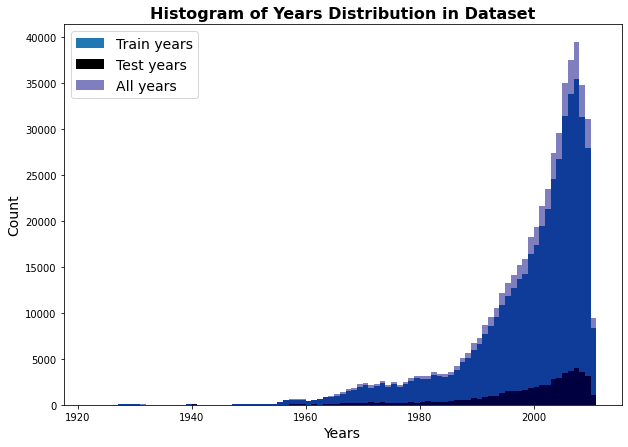

In [46]:
from matplotlib import pyplot as plt
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(trainYears, bins = unique_years, label = "Train years")
ax.hist(testYears, bins = unique_years, color = "black", label = "Test years")

ax.hist(all_years, alpha = 0.5, bins = unique_years, color = "navy",
        label = "All years")
 
format_plot(ax, xlab = "Years", ylab = "Count", 
            title = "Histogram of Years Distribution in Dataset", legend = True)
# Show plot
plt.show()

#### Part 3 - Implementing Ridge (Tikhonov) Regression (6 points)

*Please read the entire assignment. If you write your code correctly you do not need to
implement stochastic gradient descent with mini-batches multiple times. You can implement
it once in a function, then you just specify the input features, target values, weight decay
factor, the loss type (L2, count, or cross-entropy), form of weight decay (none, L2, or L1),
and whether to use momentum or not (momentum is used a later problem). It is up to
you, but you can make the assignment much easier by doing this.*

Implement stochastic gradient descent with mini-batches to minimize the loss and evaluate the train and test MSE.

Tune the learning rate and weight decay factor. Subsequently, show the train and test loss as a function of epochs, where the number of epochs should be chosen to ensure the train loss is minimized.

This problem can be solved directly using the pseudoinverse. 
$Let X = [x_1, x_2, . . . , x_N ]$ and
$y = [y_1, y_2, . . . , y_N ]^T$, then the pseudoinverse solution is given by 

$$ w = (XX^T + αI)^{−1} Xy$$.

Compare both solutions.

__Tip:__ Debug your models by using an initial training set that only has about 100 examples
and make sure your train loss is going down.

__Tip:__ If you don’t use a constant (bias), things will go very bad. If you don’t normalize
your features by ‘z-score’ normalization of your data then things will go very badly. This
means you should compute the training mean across feature dimensions and the training
standard deviation, then normalize by subtracting the training mean from both the train
and test sets, and dividing both sets by the training standard deviation

<font color='blue'> 

#### Solution:
    
The pseudoinverse computes the mathematical optimal weights to minimize the MSE on the training set. Therefore, it makes sense that no matter the parameter tuning, the RidgeSDG model still performs slightly worse than the pseudoinverse (91.768 vs 91.345). The pseudoinverse model is also very slightly better at generalizing to the test set, scoring a MSE of 90.546 against the 90.978 of the Ridge model.

In conclusion, there is no significant inbalance in results between the two models, which both overall score very accurately.

In [48]:
# pseudoinverse solution
def compute_pseudoinverse(X_train, y_train, X_test, y_test, alpha, 
                          normalize = True, bias = True):
    
    if normalize:
        mean = np.mean(X_train, axis = 0)
        std = np.std(X_train, axis = 0)

        X_train = (X_train - mean) / std
        X_test = (X_test - mean) / std   
        
    if bias: 
        X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
        X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
        
    
    y = y_train.reshape(-1, 1)
    
    w = np.matmul(
        np.linalg.inv(np.matmul(X_train.T, X_train) + 
                      np.dot(alpha, np.identity(X_train.shape[1]))),
        np.matmul(X_train.T, y)
    )

    train_pred, test_pred = np.squeeze(np.dot(X_train, w)), \
                            np.squeeze(np.dot(X_test, w))
    train_loss = musicMSE(train_pred, y_train)
    test_loss = musicMSE(test_pred, y_test)
    
    return w, train_loss, test_loss

w, train_loss, test_loss = compute_pseudoinverse(trainFeat, trainYears, 
                                                 testFeat, testYears, alpha = 0.1)

print("Pseudoinverse train loss: ", train_loss)
print("Pseudoinverse test loss: ", test_loss)

Pseudoinverse train loss:  91.34496909733154
Pseudoinverse test loss:  90.5461253897852


In [49]:
class MiniBatchSGD:
    
    def __init__(self, epochs = 100, learning_rate = 0.01, batch_size = 1024, 
                 alpha = 0.1, weight_decay = "L2", loss_function = musicMSE, 
                 momentum = 0, normalize = True, bias = True, use_count_regression = False):
    
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.alpha = alpha
        self.weight_decay = weight_decay
        self.loss_function = loss_function
        self.momentum = momentum
        self.normalize = normalize
        self.bias = bias
        self.use_count_regression = use_count_regression
        
        self.train_loss_array = []
        self.test_loss_array = []
     
    def fit_and_predict(self, x_train, y_train, x_test, y_test):
        
        # Normalize the input features if requested
        if self.normalize:
            mean = np.mean(x_train, axis = 0)
            std = np.std(x_train, axis = 0)

            x_train = (x_train - mean) / std
            x_test = (x_test - mean) / std   

        # Add a bias term if requested
        if self.bias:
            x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
            x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

        n, d = x_train.shape
        self.weights = np.random.randn(d)
        self.velocity = np.zeros((d,))

        for epoch in range(self.epochs):
            
            # Shuffle training data
            perm = np.random.permutation(n)
            x_train_perm = x_train[perm]
            y_train_perm = y_train[perm]

            # Mini-batch
            for i in range(0, x_train_perm.shape[0], self.batch_size):
                x_batch = x_train_perm[i: i + self.batch_size]
                y_batch = y_train_perm[i: i + self.batch_size]
                y_pred = np.dot(x_batch, self.weights)

                # To prevent overflow
                max_y_pred = np.max(y_pred)
                exp_y_pred = np.exp(y_pred - max_y_pred)
                sum_exp_y_pred = np.sum(exp_y_pred)
                
                grad =  - (
                    2 * np.dot(x_batch.T, y_batch - y_pred * exp_y_pred / sum_exp_y_pred) 
                    + 2 * self.alpha * self.weights.T
                ) / self.batch_size \
                if self.use_count_regression else \
                - (
                    2 * np.dot(x_batch.T, y_batch - y_pred) + 2 * self.alpha * self.weights.T
                )  / self.batch_size
                
                # regularizations (skipping bias)
                if self.weight_decay == 'L2':
                    w_copy = np.copy(self.weights)
                    w_copy[-1] = 0
                    grad += self.alpha * w_copy
                
                elif self.weight_decay == 'L1':
                    w_copy = np.copy(self.weights)
                    w_copy[-1] = 0
                    grad += self.alpha * np.sign(w_copy)

                if self.momentum != 0:
                    self.velocity = self.momentum * self.velocity - \
                                    self.learning_rate * np.squeeze(grad)
                    self.weights += self.velocity
                else: 
                    self.weights -= self.learning_rate * np.squeeze(grad)

            train_pred = np.dot(x_train, self.weights)
            test_pred = np.dot(x_test, self.weights)
            
            train_loss = self.loss_function(train_pred, y_train)
            test_loss = self.loss_function(test_pred, y_test)

            self.train_loss_array.append(train_loss)
            self.test_loss_array.append(test_loss)

In [50]:
minibatchSGD_L2 = MiniBatchSGD(epochs = 20, learning_rate = 10e-3,
                               batch_size = 4096, alpha = 0.1) 
minibatchSGD_L2.fit_and_predict(trainFeat, trainYears, testFeat, testYears)

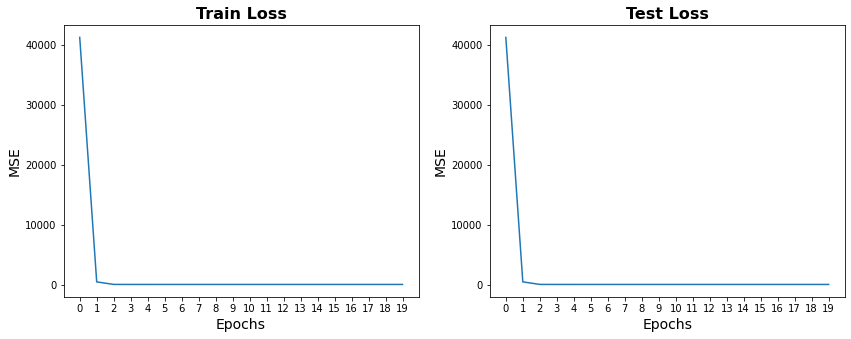

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].plot(range(minibatchSGD_L2.epochs), minibatchSGD_L2.train_loss_array)
format_plot(ax[0], xlab = "Epochs", ylab = "MSE", title = "Train Loss", 
            xticks = range(minibatchSGD_L2.epochs))

ax[1].plot(range(minibatchSGD_L2.epochs), minibatchSGD_L2.test_loss_array)
format_plot(ax[1], xlab = "Epochs", ylab = "MSE", title = "Test Loss", 
            xticks = range(minibatchSGD_L2.epochs))

plt.show()

In [52]:
print("Final RidgeSDG Train Loss: ", minibatchSGD_L2.train_loss_array[-1])
print("Final RidgeSDG Test Loss: ", minibatchSGD_L2.test_loss_array[-1])

Final RidgeSDG Train Loss:  91.76544809947511
Final RidgeSDG Test Loss:  90.91975751002305


#### Part 4 - Implementing L1 Weight Decay (6 points)
Implement lasso regression using stochastic gradient descent with mini-batches. Tune the
learning rate and weight decay factor. Subsequently, show the train and test loss as a
function of epochs, where the number of epochs should be chosen to ensure the train loss
is minimized.

<font color='blue'> 

#### Solution:

In [12]:
minibatchSGD_L1 = MiniBatchSGD(epochs = 20, learning_rate = 10e-3, batch_size = 4096,
                               alpha = 0.1, weight_decay = "L1") 
minibatchSGD_L1.fit_and_predict(trainFeat, trainYears, testFeat, testYears)

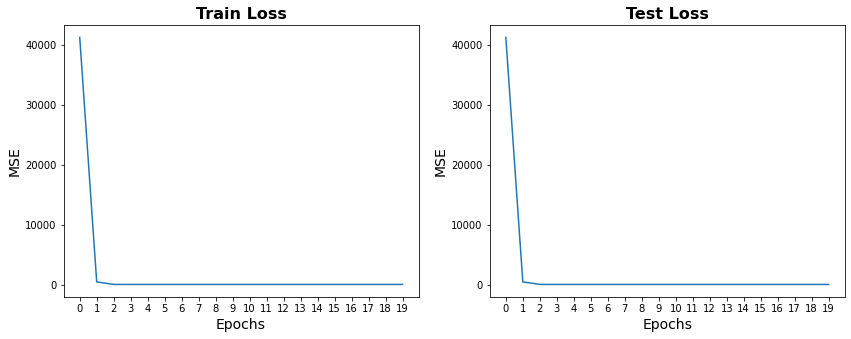

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].plot(range(minibatchSGD_L1.epochs), minibatchSGD_L1.train_loss_array)
format_plot(ax[0], xlab = "Epochs", ylab = "MSE", title = "Train Loss", 
            xticks = range(minibatchSGD_L1.epochs))

ax[1].plot(range(minibatchSGD_L1.epochs), minibatchSGD_L1.test_loss_array)
format_plot(ax[1], xlab = "Epochs", ylab = "MSE", title = "Test Loss", 
            xticks = range(minibatchSGD_L1.epochs))


plt.show()

In [14]:
print("Final LassoSDG Train Loss: ", minibatchSGD_L1.train_loss_array[-1])
print("Final LassoSDG Test Loss: ", minibatchSGD_L1.test_loss_array[-1])

Final LassoSDG Train Loss:  91.68484885080028
Final LassoSDG Test Loss:  90.86932269373051


#### Part 5 - Implementing Count Regression (6 points)
Implement count regression. Minimize the loss using SGD with mini-batches to find an
optimal w. Compute the gradient update rule and show it. Plot the train and test loss
as a function of epochs. Compute the train and test MSE using the function we created
earlier

<font color='blue'> 

#### Solution:

In [54]:
# Non-required. But MSE is not commonly used in count regression, a much more suitable loss function would
# be negative binomial loss.

from scipy.special import gammaln

def negative_binomial_loss(y_pred, y_true, r = 1):
    alpha = y_pred / (r + y_pred)
    beta = r / (r + y_pred)
    log_prob = gammaln(r + y_true) - gammaln(y_true + 1) - gammaln(r) + \
               r * np.log(beta) + y_true * np.log(alpha)
    return -np.mean(log_prob)

In [59]:
count_regression_model = MiniBatchSGD(epochs = 20, learning_rate = 10e-3, batch_size = 4096,
                                      alpha = 0.1, loss_function = musicMSE,
                                      use_count_regression = True) 
count_regression_model.fit_and_predict(trainFeat, trainYears, testFeat, testYears)

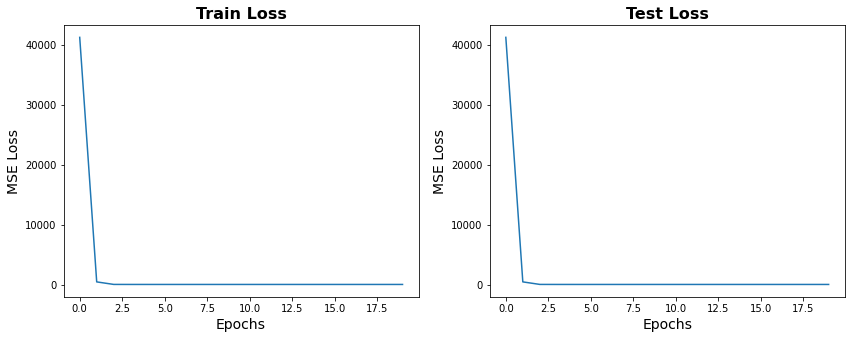

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].plot(range(count_regression_model.epochs), count_regression_model.train_loss_array)
format_plot(ax[0], xlab = "Epochs", ylab = "MSE Loss", title = "Train Loss"
            )

ax[1].plot(range(count_regression_model.epochs), count_regression_model.test_loss_array)
format_plot(ax[1], xlab = "Epochs", ylab = "MSE Loss", title = "Test Loss")           


plt.show()

In [61]:
print("Final CountRegression L2 Train Loss: ", count_regression_model.train_loss_array[-1])
print("Final CountRegression L2 Test Loss: ", count_regression_model.test_loss_array[-1])

Final CountRegression L2 Train Loss:  91.7541566569049
Final CountRegression L2 Test Loss:  90.97236156572602


#### Part 6 - Model Comparison (10 points)
Plot a histogram of the weights for the ridge, lasso, and count regression models. Discuss
how the weights differ.

Discuss and compare the behaviors of the models. Are there certain periods (ranges of
years) in which models perform better than others? Where are the largest errors across
models. Did regularization help for some models but not others?

<font color='blue'> 

#### Solution:
    
Inspecting the log weight for each feature and model, it is clear that the trained models are very similar to each other, in terms on which features they consider most in making decisions.
    
Feature number 90 seems to be the most influencial and its weight is extremely close in all models.
Also features 0, 1, 2, 5 and 22 are considered to convey some important information on the final prediction, but on a much smaller scale than feature 90. All models seem to roughly agree also on the weighting to assign to these less important features. Finally, every other feature seems to have such a small impact to be negligible.
    
In manually fine tuning hyperparameters, I observed that regularization is absolutely necessary for the convergence of every model, thus there are no models in which it did not help or it could be omitted. Count Regression performed similarly with either L2 or L1 regularization (here results are only presented with L2).

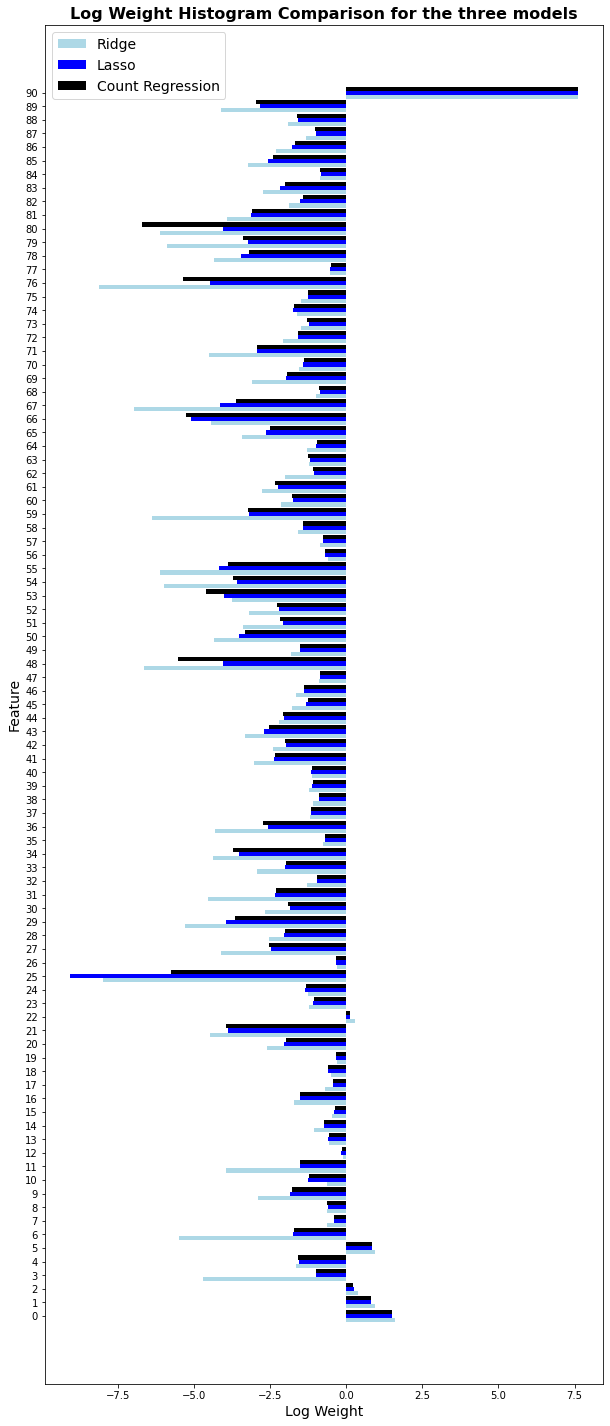

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (10, 25))

ind = np.arange(minibatchSGD_L1.weights.shape[0]) 
width = 0.3
eps = 10e-6

bar1 = ax.barh(ind - width, np.log(np.abs(minibatchSGD_L1.weights) + eps),
               width, color = 'lightblue', label = "Ridge")
bar2 = ax.barh(ind, np.log(np.abs(minibatchSGD_L2.weights) + eps), 
               width, color = 'blue', label = "Lasso")
bar3 = ax.barh(ind + width, np.log(np.abs(count_regression_model.weights) + eps), 
               width, color = 'black', label = "Count Regression")

format_plot(ax, xlab = "Log Weight", ylab = "Feature", legend = True, yticks = ind,
            title = "Log Weight Histogram Comparison for the three models")
plt.show()

### Problem 5 - Softmax Properties

#### Part 1 (7 points)
Recall the softmax function, which is the most common activation function used for the
output of a neural network trained to do classification. In a vectorized form, it is given
by 

$$ softmax(a) = \frac{exp(a)}{\sum_{j=1}^K exp(aj)},$$

where $a ∈ R^K$. The exp function in the numerator is applied element-wise and $aj$ denotes the j’th element of $a$.


Show that the softmax function is invariant to constant offsets to its input, i.e.,

$$ softmax (a + c_1) = softmax (a),$$

where $c ∈ R$ is some constant and 1 denotes a column vector of 1’s.

<font color='blue'> 

#### Solution:

<font color='blue'> 


$$ 
    softmax(a + c_1) = \frac{e^{a + c_1}}{\sum_{j = 1}^K e^{a + c_1}_j}
                     = \frac{e^{a} e^{c_1}}{\sum_{j = 1}^K e^{a}_j e^{c_1}}
                     = \frac{e^{a} e^{c_1}}{ e^{c_1}\sum_{j = 1}^K e^{a}_j}
                     = \frac{e^{a}}{ \sum_{j = 1}^K e^{a}_j}    
                     = softmax(a)
$$

#### Part 2 (3 points)
In practice, why is the observation that the softmax function is invariant to constant offsets
to its input important when implementing it in a neural network?



<font color='blue'> 

#### Solution:
    
This property is important because neural network during training often suffers of numerical instability. The invariance of the softmax function makes it robust to additions and subtractions of constants, i.e. allows us to perform operations such as normalize the input by subtracting the max  element from all element, which are beneficial towards the numerical stability of the model and its computational cost.

### Problem 6 - Implementing a Softmax Classifier

For this problem, you will use the 2-dimensional Iris dataset. Download iris-train.txt
and iris-test.txt from Canvas. Each row is one data instance. The first column is the
label (1, 2 or 3) and the next two columns are features.
Write a function to load the data and the labels, which are returned as NumPy arrays.

#### Part 1 - Implementation & Evaluation (20 points)
Recall that a softmax classifier is a shallow one-layer neural network of the form:

$$P (C = k|x) = \frac{exp(w_k^T x)}{\sum_{j=1}^K exp(w_j^T x)}$$

where $x$ is the vector of inputs, $K$ is the total number of categories, and $w_k$ is the weight
vector for category $k$. The bias has been omitted, but you can incorporate it by appending
a ‘1’ to each $x$.

In this problem you will implement a softmax classifier from scratch. Do not use a
toolbox. Use the softmax (cross-entropy) loss with $L_2$ weight decay regularization. Your
implementation should use stochastic gradient descent with mini-batches and momentum
to minimize softmax (cross-entropy) loss of this single layer neural network. To make your
implementation fast, do as much as possible using matrix and vector operations. This will
allow your code to use your environment’s BLAS. Your code should loop over epochs and
mini-batches, but do not iterate over individual elements of vectors and matrices. Try
to make your code as fast as possible. I suggest using profiling and timing tools to do
this.

Train your classifier on the Iris dataset for 1000 epochs. You should either subtract the
mean of the training features from the train and test data or normalize the features to be
between -1 and 1 (instead of 0 and 1). Initialize your weights from a Gaussian distribution
Hand tune the hyperparameters (i.e., learning rate, mini-batch size, momentum rate, and
L2 weight decay factor) to achieve the best possible training accuracy. During a training
epoch, your code should compute the mean per-class accuracy for the training data and
the loss. After each epoch, compute the mean per-class accuracy for the testing data and
the loss as well. The test data should not be used for updating the weights.

After you have tuned the hyperparameters, generate two plots next to each other. The one
on the left should show the cross-entropy loss during training for both the train and test
sets as a function of the number of training epochs. The plot on the right should show the
mean per-class accuracy as a function of the number of training epochs on both the train
set and the test set.

What is the best test accuracy your model achieved? What hyperparameters did you use?
Would early stopping have helped improve accuracy on the test data?

In [20]:
def load_data_and_labels():
    train = np.loadtxt("data/iris-train.txt")
    train_y = train[:, 0]
    train_x = train[:, [1, 2]]
    
    test = np.loadtxt("data/iris-test.txt")
    test_y = test[:, 0]
    test_x = test[:, [1, 2]]
    
    return train_x, train_y, test_x, test_y

In [21]:
train_x, train_y, test_x, test_y = load_data_and_labels()

In [58]:
class SoftmaxClassifier:
    
    def __init__(self, epochs = 100, batch_size = 32, learning_rate = 0.01, 
                 classes = 3, alpha = 0.1, momentum = 0, EPS = 10e-9, weights = None):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.classes = classes
        self.alpha = alpha
        self.momentum = momentum
        self.EPS = EPS
        self.weights = weights
        
        self.train_loss_array = []
        self.test_loss_array = []
        self.train_accuracy_array = []
        self.test_accuracy_array = []
            
    def forward_propagate(self, X):  
        return np.transpose(np.dot(np.transpose(self.weights), np.transpose(X)))

    def compute_softmax_vector(self, X):
        e_x = np.exp(X - np.max(X))
        return e_x / e_x.sum()

    def compute_softmax_matrix(self, X):
        flat_x = np.array([])
        for i in X:
            flat_x = np.append(flat_x, self.compute_softmax_vector(i))

        return flat_x.reshape(X.shape[0], self.classes)
    
    
    def return_indices(self, list_idx, value):
        return_list = []
        last_idx = 0
        
        while value in list_idx[last_idx:]:
            i = list_idx[last_idx:].index(value)
            return_list.append(last_idx + i)
            last_idx += i + 1   
        
        return return_list

    def compute_per_class_accuracy(self, y_pred, y_true, class_num):
        y_pred, y_true = list(y_pred), list(y_true)
        index = self.return_indices(y_true, class_num)
        
        y_pred, y_true = [y_pred[i] for i in index], [y_true[i] for i in index]
        
        cum_accuracy = [1 for i in range(len(y_pred)) if y_true[i] == y_pred[i]]
        
        if not len(y_pred):
            return 1
        return  np.sum(cum_accuracy) / int(len(y_pred))

    def compute_mean_per_class_accuracy(self, y_pred, y_true):
        return (
            self.compute_per_class_accuracy(y_pred, y_true, 1) + 
            self.compute_per_class_accuracy(y_pred, y_true, 2) + 
            self.compute_per_class_accuracy(y_pred, y_true, 3)
        ) / 3  
    
    def predict(self, X):
        forw_out = self.forward_propagate(X)
        softmax_out = self.compute_softmax_matrix(forw_out)
        return np.argmax(softmax_out, axis = 1) + 1
        
        
    def fit_and_predict(self, train_x, train_y, test_x, test_y):
        
        # Normalize data
        mean_training = np.mean(train_x)
        train_x = train_x - mean_training
        test_x = test_x - mean_training 

        n, d = train_x.shape[0], train_x.shape[1]
    
        # One hot encoding
        labels_1h_test = np.zeros((test_x.shape[0], self.classes))

        for i in range(test_x.shape[0]):  
            labels_1h_test[i, int(test_y[i]) - 1] = 1

        # Initialize weights
        if self.weights is None:
            self.weights = np.random.rand(d, self.classes)
        
        flat_test_1h = labels_1h_test.reshape(1, labels_1h_test.shape[0] * \
                                              labels_1h_test.shape[1])

        self.velocity = np.zeros((train_x.shape[1], 1))
        
        
        for epoch in range(self.epochs):
            perm = np.random.permutation(n)
            x_train_perm = train_x[perm]
            y_train_perm = train_y[perm]

            batch_accuracy_array = []
            batch_loss_array = []

            for i in range(0, x_train_perm.shape[0], self.batch_size):
                x_batch = x_train_perm[i: i + self.batch_size]
                y_batch = y_train_perm[i: i + self.batch_size]
                y_pred = np.dot(x_batch, self.weights)

                labels_1h_train = np.zeros((self.batch_size, self.classes))
                for i in range(self.batch_size):
                    labels_1h_train[i, int(y_batch[i]) - 1] = 1
                
                flat_train_1h = labels_1h_train.reshape(1, labels_1h_train.shape[0] * \
                                                        labels_1h_train.shape[1])

                # Forward propagation:
                train_forw_out = self.forward_propagate(x_batch)

                # Step 2: Perform softmax to get probabilities for each class
                train_softmax_out = self.compute_softmax_matrix(train_forw_out)

                train_preds = np.argmax(train_softmax_out, axis = 1) + 1
                acc_train = self.compute_mean_per_class_accuracy(train_preds, y_batch)

                # Backprop
                log_train = np.log(
                    train_softmax_out.reshape(
                        train_softmax_out.shape[0] * train_softmax_out.shape[1], 1
                    ) + self.EPS
                )
                
                loss_train = (-1 * np.dot(flat_train_1h, log_train)[0][0]) / x_batch.shape[0]

                error_matrix = train_softmax_out - labels_1h_train
                grad = self.alpha * self.weights + \
                       np.transpose(np.dot(np.transpose(error_matrix), x_batch))
                
                if self.momentum != 0:
                    self.velocity = self.momentum * self.velocity - self.learning_rate * grad
                    self.weights += self.velocity
                else :
                    self.weights -= (self.learning_rate * grad)       

                batch_loss_array.append(loss_train)
                batch_accuracy_array.append(acc_train)


            self.train_loss_array.append(np.mean(batch_loss_array))
            self.train_accuracy_array.append(np.mean(batch_accuracy_array))

            # Test
            test_forw_out = self.forward_propagate(test_x)
            
            test_softmax_out = self.compute_softmax_matrix(test_forw_out)

            test_preds = np.argmax(test_softmax_out, axis = 1) + 1
            acc_test = self.compute_mean_per_class_accuracy(test_preds, test_y)
            self.test_accuracy_array.append(acc_test)

            # Compute loss
            log_test = np.log(
                test_softmax_out.reshape(
                    test_softmax_out.shape[0] * test_softmax_out.shape[1], 1
                ) + self.EPS
            )
            loss_test = (-1 * np.dot(flat_test_1h, log_test)[0][0]) / test_x.shape[0]
            self.test_loss_array.append(loss_test)


In [23]:
softmax_classifier = SoftmaxClassifier(epochs = 1000, batch_size = 90, 
                                       alpha = 0.01, momentum = 0.85)
softmax_classifier.fit_and_predict(train_x, train_y, test_x, test_y)

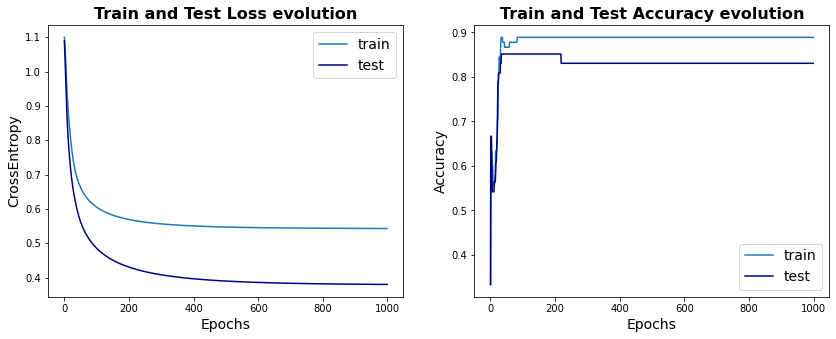

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].plot(range(softmax_classifier.epochs), softmax_classifier.train_loss_array, 
           label = "train")
ax[0].plot(range(softmax_classifier.epochs), softmax_classifier.test_loss_array,
           color = "navy", label = "test")

format_plot(ax[0], xlab = "Epochs", ylab = "CrossEntropy", 
            title = "Train and Test Loss evolution", legend = True)

ax[1].plot(range(softmax_classifier.epochs), softmax_classifier.train_accuracy_array, 
           label = "train")
ax[1].plot(range(softmax_classifier.epochs), softmax_classifier.test_accuracy_array,
           color = "navy", label = "test")

format_plot(ax[1], xlab = "Epochs", ylab = "Accuracy", 
            title = "Train and Test Accuracy evolution", legend = True)


plt.show()

#### Part 2 - Displaying Decision Boundaries (10 points)

Plot the decision boundaries learned by softmax classifier on the Iris dataset, just like we
saw in class. On top of the decision boundaries, generate a scatter plot of the training
data. Make sure to label the categories.

<font color='blue'> 

#### Solution:

In [25]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def plot_decision_boundary(model, X, y):
    # Normalize data
    mean_training = np.mean(X)
    X = X - mean_training

    cmap = ListedColormap(['lightblue','blue', 'navy'])
    h = 0.02

    # Determine the range of the plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # One hot encoding
    Z_1h = np.zeros((Z.shape[0], 3))

    for i in range(Z.shape[0]):  
        Z_1h[i, int(Z[i]) - 1] = 1
    
    Z = np.argmax(Z_1h, axis = 1).reshape(xx.shape)

    # Plot the decision boundary and the training points
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))

    ax.contourf(xx, yy, Z, cmap = cmap, alpha = 0.5)
    scatter = ax.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolors = 'k')
    
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
    
    format_plot(ax, xlab = "Sepal Width", ylab = "Sepal Length", 
            title = "Softmax Classifier Decision Boundaries")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

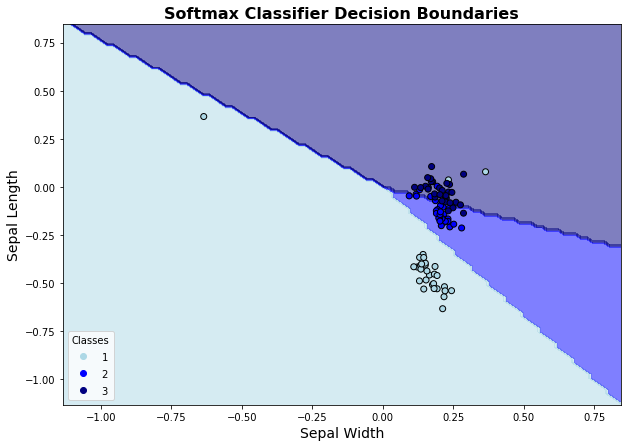

In [26]:
plot_decision_boundary(softmax_classifier, train_x, train_y)

In [27]:
print("Final Test Accuracy on Iris Dataset: ", softmax_classifier.test_accuracy_array[-1])

Final Test Accuracy on Iris Dataset:  0.8305555555555556


### Problem 7 - Classifying Images (10 points)

Recall the CIFAR-10 dataset from Homework 0. Using the softmax classifier you implemented, train the model on CIFAR-10’s training partitions. To do this, you will need
to treat each image as a vector. You will need to tweak the hyperparmaters you used
earlier.

Plot the training loss as a function of training epochs. Try to minimize the error as much
as possible. What were the best hyperparmeters? Output the final test accuracy and a
normalized 10 × 10 confusion matrix computed on the test partition. Make sure to label
the columns and rows of the confusion matrix.

<font color='blue'> 

#### Solution:
    
I extensively tuned hyperparameters manually and found that a larger batch_size would improve performance (so I used batch_size = 64). Moreover, regularization and a relatively small learning rate ensured that the accuracy would not strongly oscillate during training epochs, hence I opted for alpha = 0.1 and learning rate = 0.0001). Finally I used momentum, which generally lies in the range [0.8-0.99], but yielded the best results when momentum = 0.9.

In [28]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [29]:
test_batch_unpickled = np.array(
                           unpickle('data/cifar-10-batches-py/test_batch')[b'data']
                       ).reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1) 
test_labels = np.array(unpickle('data/cifar-10-batches-py/test_batch')[b'labels'])

meta_data_unpickled = unpickle('data/cifar-10-batches-py/batches.meta')

labnames = meta_data_unpickled[b'label_names']



In [34]:
weights = None
softmax_classifier = None

imgs_test = test_batch_unpickled.reshape(-1, 32 * 32 * 3)
for i in range(1, 6):
    print("Training on batch number " + str(i))
    curr_batch_unpickled = unpickle('data/cifar-10-batches-py/data_batch_' + str(i)) 
    train_imgs = np.array(curr_batch_unpickled[b'data']) \
                    .reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
    train_labels = np.array(curr_batch_unpickled[b'labels'])
    
    imgs_train = train_imgs.reshape(-1, 32 * 32 * 3)

    softmax_classifier = SoftmaxClassifier(epochs = 1000, batch_size = 16, classes = 10, 
                                           alpha = 0.1, learning_rate = 0.10e-4, 
                                           momentum = 0.9, weights = weights)
    
    softmax_classifier.fit_and_predict(imgs_train, train_labels, imgs_test, test_labels)

    weights = softmax_classifier.weights

Training on batch number 1
Training on batch number 2
Training on batch number 3
Training on batch number 4
Training on batch number 5


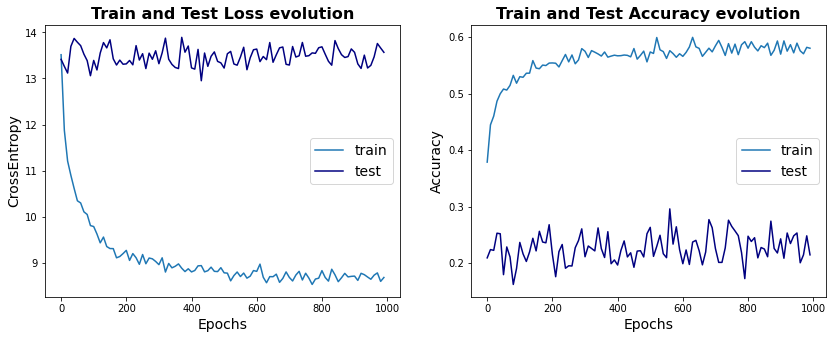

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
density = 10

ax[0].plot(range(0, softmax_classifier.epochs, density), 
           softmax_classifier.train_loss_array[::density], label = "train")
ax[0].plot(range(0, softmax_classifier.epochs, density), 
           softmax_classifier.test_loss_array[::density], color = "navy", label = "test")

format_plot(ax[0], xlab = "Epochs", ylab = "CrossEntropy", 
            title = "Train and Test Loss evolution", legend = True)

ax[1].plot(range(0, softmax_classifier.epochs, density), 
           softmax_classifier.train_accuracy_array[::density], label = "train")
ax[1].plot(range(0, softmax_classifier.epochs,density), 
           softmax_classifier.test_accuracy_array[::density], color = "navy", label = "test")

format_plot(ax[1], xlab = "Epochs", ylab = "Accuracy", 
            title = "Train and Test Accuracy evolution", legend = True)


plt.show()

In [36]:
print("Final Train Accuracy on CIFAR10: ", softmax_classifier.train_accuracy_array[-1])
print("Final Test Accuracy on CIFAR10: ", softmax_classifier.test_accuracy_array[-1])

Final Train Accuracy on CIFAR10:  0.5945638095238095
Final Test Accuracy on CIFAR10:  0.25733333333333336


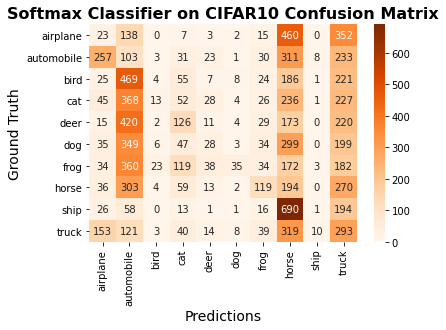

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

class_names = [name.decode("ascii") for name in labnames]

cm = confusion_matrix(test_labels, softmax_classifier.predict(imgs_test))[:-1, 1:]
df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

ax = sn.heatmap(df_cm, cmap = 'Oranges', annot = True, fmt='d')

format_plot(ax, xlab = "Predictions", ylab = "Ground Truth", no_scientific = False,
            title = "Softmax Classifier on CIFAR10 Confusion Matrix")
plt.show()